In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [18]:
train_annotations_path = 'Fruits-detection\\train\labels'
train_images_path = 'Fruits-detection\\train\images'

with Image.open(os.path.join(train_images_path, '0a2bfef3b22f77b6_jpg.rf.1a02b2e598332c6a99dda6d89eda1f9c.jpg')) as img:
    # Get the width and height
    WIDTH, HEIGHT = img.size

    print(f"Width: {WIDTH}, Height: {HEIGHT}")

Width: 640, Height: 640


In [21]:
data = []
id = 1
for label_file in os.listdir(train_annotations_path):
    
	label_file_name = label_file[:-4]
	label_file_path = os.path.join(train_annotations_path, label_file)
	with open(label_file_path, 'r') as f:
		lines = f.readlines()
        
	data.append(
		{'image_id': id,
		'file_name': label_file_name,
		'#bbox': len(lines),
		'width': WIDTH,
		'height': HEIGHT
		}
	)
	id += 1
	

df = pd.DataFrame(data)

In [22]:
df

,image_id,file_name,#bbox,width,height
0,1,0000a16e4b057580_jpg.rf.00ab48988370f64f5ca8ea...,7,640,640
1,2,0000a16e4b057580_jpg.rf.7e6dce029fb67f01eb19aa...,7,640,640
2,3,0000a16e4b057580_jpg.rf.bc4d31cdcbe229dd022957...,7,640,640
3,4,00020ebf74c4881c_jpg.rf.508192a0a97aa6c4a3b688...,1,640,640
4,5,00020ebf74c4881c_jpg.rf.5af192a2254c8ecc4188a2...,1,640,640
...,...,...,...,...,...
7103,7104,ff26ee5c7c27064d_jpg.rf.e68f37ca906de06c7f72de...,1,640,640
7104,7105,ff4cd45896de38be_jpg.rf.c4b5e967ca10c7ced3b9e9...,2,640,640
7105,7106,ff4cd45896de38be_jpg.rf.ea4c1d37d2884b3e3cbce0...,2,640,640
7106,7107,ff5fd9c3c624b7dc_jpg.rf.bb519feaa36fc4bf630a03...,1,640,640


In [23]:
def has_unique_value(arr):
    '''
    This function will check if there is at least one value in a column differ from others
    Arg:
        arr: series, arr
    Return: True if there is else return False
    '''
    first_element = arr[0]
    for element in arr:
        if element != first_element:
            return True
    return False

In [24]:
print(has_unique_value(df['width']))
print(has_unique_value(df['height']))

False
False


In [25]:
# Group the DataFrame by '#bbox' and count the number of unique 'image_id' values in each group
grouped_df = df.groupby('#bbox')['image_id'].nunique().reset_index()

# Rename the columns to '#bbox' and '#images'
grouped_df.columns = ['#bbox', '#images']

<Axes: xlabel='#bbox', ylabel='#images'>

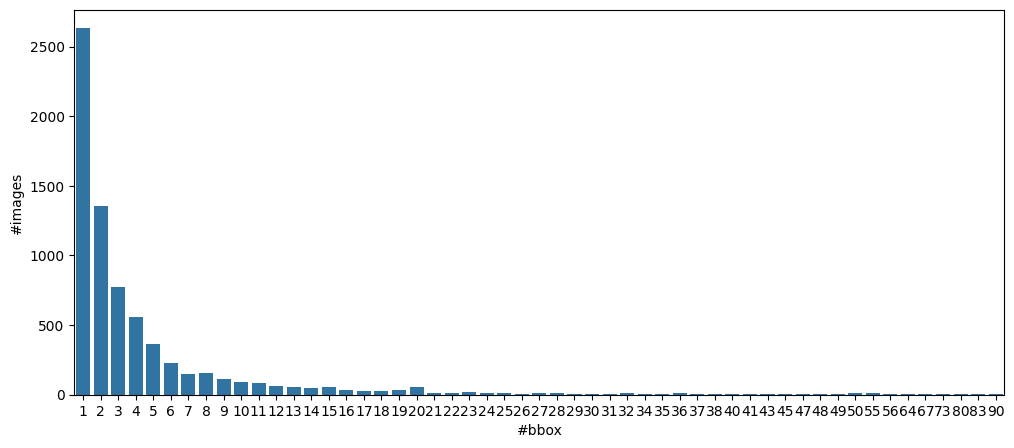

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(data=grouped_df, x='#bbox', y='#images')